In [1]:
import aplpy
from astropy.io import fits
from astropy import wcs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Launch APLpy figure of image
#img = aplpy.FITSFigure('sss_305_id797_b1_wi.fits')
hdu = fits.open('sss_305_id797_b1_wi.fits')


In [3]:
hdu.info()

Filename: sss_305_id797_b1_wi.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     196   (1340, 1340)   int16   
  1  IAM_SUBSET    1 BinTableHDU     99   426R x 18C   [1D, 1D, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1J, 1J, 1J, 1E, 1J, 1J]   
  2  IAM_DATA      1 BinTableHDU    169   426R x 32C   [1D, 1D, 1J, 1J, 1J, 1J, 1J, 1J, 1E, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J]   


In [4]:
header = hdu['PRIMARY'].header


header



SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1340 / length of data axis 1                          
NAXIS2  =                 1340 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
PLATENUM= '15846   '           / Plate number                                   
EMULSION= 'IVN     '           / Kodak emulsion type                            
FILTER  = 'RG715   '           / Schott glass filter type                       
PLTSCALE= '67.14   '           / [arcsec/mm] plate scale                        
FIELDNUM= '305     '        

In [5]:
image_data = hdu[0].data

In [6]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(1340, 1340)


# Short Cut

In [7]:
image_data = fits.getdata("sss_305_id797_b1_wr.fits")
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(1340, 1340)


In [8]:
header = fits.getheader("sss_305_id797_b1_wr.fits")

# Viewing the image data and getting basic statistics

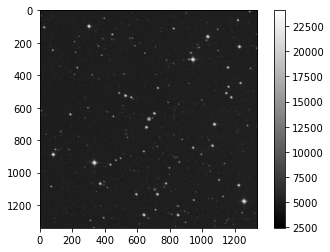

In [9]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps



Let's get some basic statistics about our image. If your image contained NaNs, you'd use np.nanmin etc below


In [10]:


print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))



Min: 2465
Max: 24068
Mean: 5170.305372020494
Stdev: 1032.734216762975


$\textbf{Plotting a histogram}$




To make a histogram with matplotlib.pyplot.hist(), I need to cast the data from a 2-D to array to something one dimensional.

In this case, I am using the iterable python object img_data.flat.


In [11]:
print(type(image_data.flat))

<class 'numpy.flatiter'>


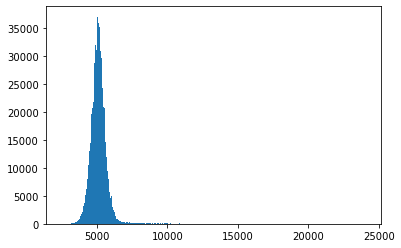

In [12]:
NBINS = 1000
histogram = plt.hist(image_data.flat, NBINS)


$\textbf{Displaying the image with a logarithmic scale}$

Want to use a logarithmic color scale? To do so we need to load the LogNorm object from matplotlib.


In [13]:
from matplotlib.colors import LogNorm

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

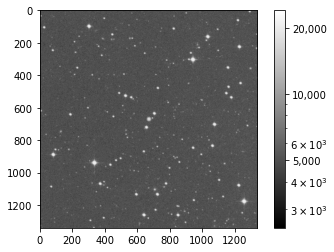

In [14]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

# Using the world coordinate system



"World coordinates" refer to RA/Dec or Galactic latitude/longitude.

The full documentation is available at: http://astropy.readthedocs.org/en/latest/wcs/


Step 1. Create a WCS object

In [18]:

mywcs = wcs.WCS(hdu[1].header, hdu)


In [19]:
pix_coords = [(20,30), (50,10), (500,200)]
world_coords = mywcs.wcs_pix2world(pix_coords, 0)
print(world_coords)

[[ 21.  31.]
 [ 51.  11.]
 [501. 201.]]


In [20]:
from astropy import coordinates
from astropy import units as u
my_coords = coordinates.SkyCoord(world_coords*u.deg, frame='fk5')
print(my_coords)
print(my_coords.to_string(style='hmsdms'))

ValueError: Cannot parse first argument data "[ 31.  11. 201.] deg" for attribute dec